In [11]:
from IPython.display import Image
from IPython.core.display import HTML
import mglearn
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#지도학습" data-toc-modified-id="지도학습-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>지도학습</a></span><ul class="toc-item"><li><span><a href="#분류와-회귀" data-toc-modified-id="분류와-회귀-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>분류와 회귀</a></span></li><li><span><a href="#일반화,-관대적합,-과소적합" data-toc-modified-id="일반화,-관대적합,-과소적합-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>일반화, 관대적합, 과소적합</a></span><ul class="toc-item"><li><span><a href="#모델-복잡도와-데이터셋-크기의-관계" data-toc-modified-id="모델-복잡도와-데이터셋-크기의-관계-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>모델 복잡도와 데이터셋 크기의 관계</a></span></li></ul></li><li><span><a href="#지도학습-알고리즘" data-toc-modified-id="지도학습-알고리즘-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>지도학습 알고리즘</a></span><ul class="toc-item"><li><span><a href="#데이터셋" data-toc-modified-id="데이터셋-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>데이터셋</a></span></li></ul></li></ul></li></ul></div>

# 지도학습
지도학습은 머신러닝 방법 중 하나로, 붓꽃의 실제 측정값을 이용해 품종을 구분하는 지도 학습 애플리케이션을 하나 보았다. 

지도학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다! 입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만든다. 목표는 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것이다. 지도 학습은 종종 훈련 데이터를 만드는 데 사람의 노력이 필요하지만 자동화하면 힘들고 어려운 작업의 속도를 높일 수 있다.

## 분류와 회귀
지도학습에는 분류classification 와 회귀regression 가 있다.

미리 정의된, 가능성 있는 여러 **클래스 레이블** 중 하나를 예측하는 것이 분류! 두 개의 클래스로 분류하는 **이진 분류binary classification**와 셋 이상의 클래스로 분류하는 **다중 분류multiclass classification**로 나뉜다. 이진 분류는 질문의 답이 예/아니오만 나올 수 있도록 하는 것으로 생각해 볼 수 있다. 예) 이메일의 스팸인가요?

    ! 이진 분류에서 한 클래스를 양성 클래스, 다른 하나를 음성 클래스라고도 한다. 양성 클래스라고 해서 좋은 값이나 장점을 뜻하는 것이 아니다. 어떤 것을 양성이라 할지는 보통 주관적인 문제이며 분야에 따라 달라진다
    
붓꽃의 예는 다중 분류 문제, 다른 예는 웹사이트의 글로부터 어떤 언어의 웹 사이트인지를 예측하는 것이 있다. 여기서 클래스는 미리 만들어놓은 언어 목록이 된다.

회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수 (수학 용어로는 실수)를 예측하는 것이다. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측한느 것이 회귀 문제의 한 예시. 소득을 예측할 때 예측된 값은 어떤 양으로서, 일정 범위 안의 어떤 숫자도 될 수 있다. 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측하는 예도 회귀 문제이다. 수확량 역시 어떤 숫자든 될 수 있다.

출력 값에 연속성이 있는지 알아보면 회귀와 분류 문제를 쉽게 구분 가능하다. 예상 출력 값 사이에 연속성이 있다면 회귀 문제이다. 연소득 예측을 하는 경우, 출력에 확실하게 연속성이 있다.

반면 웹사이트가 어떤 언어로 되어 있는지 인식하는 작업에는 어떤 정도라는 것이 없다.
즉 웹사이트 언어는 한 언어가 아니면 다른 언어이다. 언어들 사이에 연속성이 없고, 영어와 프랑스어 사이에 다른 언어가 존재하지 않는다.

## 일반화, 관대적합, 과소적합
지도 학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 것이라 기대한다. 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화되었다고 한다. 그래서 모델을 만들 때는 가능한 정확하게 일반화되도록 해야 한다.

보통 훈련 세트에 대해 정확히 예측하도록 모델을 구축한다. 훈련 세트와 테스트 세트가 매우 비슷하다면 그 모델이 테스트 세트에도 정확히 예측하리라 기대할 수 있다. 항상 그런 것은 아니다. 예를 들어, 아주 복잡한 모델을 만든다면 훈련 세트에만 정확한 모델이 되어버린다.

예) 초보 데이터 과학자가 요트를 구매한 고객과 구매 의사가 없는 고객의 데이터를 이용해 누가 요트를 살지 예측하려 한다. 그래서 관심없는 고객을 배제하고 실제 구매할 것 같은 고객에게만 홍보 메일을 보내는 것이 목표이다.

초보 데이터 과학자가 데이터에서 "45세 이상이고 자녀가 셋 미만이며 이혼하지 않은 고객은 요트를 살 것이다"라는 규칙을 발견했다. 이 규칙의 정확도에 대해 100%라고 생각할 것이다. 그런데 이 데이터셋에서 요트를 사려고 하는 사람을 완벽하게 묘사하는 규칙은 많다. 이렇게 데이터를 만족하는 규칙은 많이 만들 수 있지만, 우리가 예측하려는 대상은 이 데이터 셋이 아니다. 이 고객들에 대한 답은 이미 알고 있고, 알고 싶은 것은 새로운 고객이 요트를 구매할 것인가 이다. 그러므로 새로운 고객에도 잘 작동하는 규칙을 찾아야 하며 훈련 세트에서 100% 정확도를 달성하는 것은 크게 의미가 없다. 

알고리즘이 새로운 데이터도 잘 처리하는지 측정하는 방법은 테스트 세트로 평가해보는 것 밖에 없다. 그러나 직관적으로 보더라도 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상할 수 있다. 만약 "50세 이상인 사람은 보트를 사려한다"라는 규칙을 만들었다면 이 규칙은 모든 고객 데이터를 만족시킬 뿐 아니라, 나이 외에 자녀 수나 혼인 상태를 추가한 규칙보다 더 신뢰할 수 있다. 그렇기 때문에 우리는 언제나 가장 간단한 모델을 찾으려고 한다. 초보 데이터 과학자가 했던 것 처럼 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것은 **과대적합overfitting** 이라고 한다. 과대적합 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다. 반대로 모델이 너무 간단하면, "집이 있는 사람은 모두 요트를 사려고 한다"와 같은 경우에는 데이터의 면면과 다양성을 잡아내지 못할 것이고 훈련 세트에도 잘 맞지 않을 것이다. 너무 간단한 모델이 선택되는 것을 **과소적합underfitting** 이라고 한다.

모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확히 예측할 수 있다. 그러나 너무 복잡해지면 훈련 세트의 곽 데이터 포인트에 너무 민감해져 새로운 데이터에 잘 일반화되지 못 한다. 따라서 일반화 성능이 최대가 되는 최대점에 있는 모델을 찾아야 한다.

In [1]:
Image(url= "https://d3i71xaburhd42.cloudfront.net/92f20a1e21a20ab24ce7e335b6f1844b92515864/43-Figure2-1-1.png")
# 이미지 출처 : 파이썬 라이브러리를 활용한 머신러닝

### 모델 복잡도와 데이터셋 크기의 관계
모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊다. 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있다. 보통 데이터 포인트를 더 많이 모으는 것이 다양성을 키워주므로 큰 데이터셋은 더 복잡한 모델을 만들 수 있게 해준다. 그러나 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다.

요트 판매 예로 들자면, 고객 데이터를 만개 모았더니 전부 45세 이상이고 자녀가 셋 미만이며 이혼하지 않는 고객은 요트를 사려고 한다라는 규칙을  만족한다면 적은 데이터를 사용할 대보다 훨씬 좋은 규칙이라고 할 수 있다.

데이터를 더 많이 수집하고 적절히 더 복잡한 모델을 만들면 지도학습에서 놀라운 결과를 얻기도 한다. 이 책에서는 고정 크기의 데이터셋을 사용하는 데 집중한다. 모델을 변경하거나 조정하는 것보다 이득일 수 있으므로 실제 환경에서는 데이터를 얼마나 많이 모을지 정해야 한다.

## 지도학습 알고리즘
다양한 머신러닝 알고리즘과 장단점을 살펴보겠다. 분류와 회귀를 모두 가지고 있는 알고리즘도 살펴보겠다.

### 데이터셋
여러 알고리즘을 설명하기 위해 데이터셋도 여러 개 사용한다. 어떤 데이터셋은 작고 인위적으로 만든 것이고, 알고리즘의 특징을 부각하기 위해 만든 것도 있다. 실제 샘플로 만든 큰 데이터셋도 있다.

두개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋이다. 다음 코드는 이 데이터셋의 모든 데이터 포인트를 산점도로 그린다. x축은 첫 번째 특성이고 y축은 두 번째 특성이다. 모든 산점도가 그렇듯 점 하나가 각 데이터 포인트를 나타낸다. 점의 색과 모양은 데이터 포인트가 속한 클래스를 나타낸다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


(26, 2)

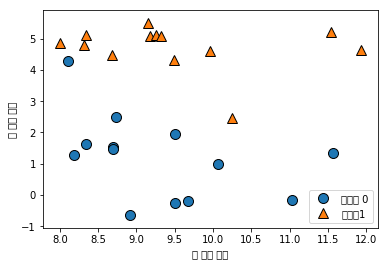

In [7]:
X, y = mglearn.datasets.make_forge()
#산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0","클래스1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
X.shape

X.shape 값에서 알 수 있듯이 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가진다. 회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용하겠다. wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)를 가진다. 

Text(0, 0.5, '타깃')

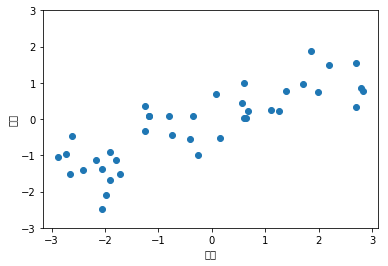

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

2차원으로 쉽게 시각화하기 위해 간단한 저차원 데이터 셋을 사용한다. 특성이 적은 데이터셋(저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터 셋(고차원 데이터 셋)에서 그대로 유지되지 않을 수 있다. 하지만 이런 사실을 유념해둔다면 알고리즘을 배울 때 저차원 데이터셋을 사용하는 것이 매우 좋다

인워적인 소규모 데이터셋 외에 사이킷런에 들어있는 실제 데이터셋도 사용해 보겠다. 하나는 유방암 종양의 임상 데이터를 기록해 놓은 위스콘신 유방암 Wisconsin Breast Cancer 데이터셋이다(줄여서 cancer). 각 종양은 양성benign(해롭지 않은 종양)과 악성malignant(암 종양)으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제이다.

이 데이터는 사이킷런에 있는 load_breast_cancer 함수로 불러올 수 있다.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
cancer.data.shape

(569, 30)

데이터셋은 569개의 데이터 포인트를 가지고 있고, 특성은 30개다.

In [5]:
print("클래스별 샘플 개수:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


596개 데이터 포인트 중 212개는 악성이고 357개는 양성이다.

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

feature_names 속성을 확인하면 각 특성의 의미를 알 수 있다

더 자세한 정보는 cancer.DESCR 에서 확인가능하다.

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

또 회귀 분석용 실제 데이터셋으로는 보스턴 주택 가격 Boston Housing 데이터셋을 사용한다. 이 데이터 셋으로 할 작업은 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것이다. 이 데이터 셋에는 데이터 포인트 506개와 특성 13개가 있다.

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


이 데이터셋에서도 boston 객체의 DESCR 속성에서 더 자세한 정보를 확인할 수 있다. 이 데이터셋에는 13개의 입력 특성뿐 아니라 특성끼리 곱하여 (또는 상호작용이라 부름) 의도적으로 확장하겠다. 다시 말하면 범죄율과 고속도로 접근성의 개별 특성은 물론, 범죄율과 고속도로 접근성의 곱도 특성으로 생각한다는 뜻이다. 이처럼 특성을 유도해내는 것을 특성 공학feature engineering이라고 한다. 유도된 데이터셋은 load_entended_boston 함수를 사용하여 불러들일 수 있다.

In [12]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


13개의 원래 특성에 13개에서 2개씩 (중복을 포함해) 짝지은 91개의 특성을 더해 총 104개의 특성이다.